# Ohio MAUP Data Preparation

In [ ]:
# prepare and install dependencies
!pip install maup
import pandas as pd
import geopandas as gpd
import maup
import os

In [3]:
# setups
maup.progress.enabled = True

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Import Shapefiles and Convert to DF

In [4]:
# load maup files
# NOTE: due to the large size of these raw data files, we have uploaded them to
# our Google Drive and mounted them with Google Collab. To run this notebook
# locally, you'd need to obtain the raw files from RDH.

# https://redistrictingdatahub.org/dataset/vest-2016-ohio-precinct-and-election-results/
election_df = gpd.read_file("./drive/MyDrive/oh_vest_16/oh_vest_16.shp")

# https://redistrictingdatahub.org/dataset/ohio-block-pl-94171-2020-by-table/
pop_df = gpd.read_file("./drive/MyDrive/oh_pl2020_b/oh_pl2020_p2_b.shp")
vap_df = gpd.read_file("./drive/MyDrive/oh_pl2020_b/oh_pl2020_p4_b.shp")

# https://redistrictingdatahub.org/dataset/2022-ohio-congressional-districts-approved-plan/
cong_df = gpd.read_file("./drive/MyDrive/oh_cong_adopted_2022/oh_cong_adopted_2022.shp")

Explore each DF's columns

In [5]:
election_df.columns

Index(['STATEFP16', 'COUNTYFP16', 'VTDST16', 'PRECINCT16', 'GEOID16', 'NAME16',
       'G16PRERTRU', 'G16PREDCLI', 'G16PRELJOH', 'G16PREGSTE', 'G16PREIDUN',
       'G16USSRPOR', 'G16USSDSTR', 'G16USSGDEM', 'G16USSICON', 'G16USSIRUP',
       'geometry'],
      dtype='object')

In [6]:
pop_df.columns

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P002

In [7]:
vap_df.columns

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0040001',
       'P0040002', 'P0040003', 'P0040004', 'P0040005', 'P0040006', 'P0040007',
       'P0040008', 'P0040009', 'P0040010', 'P0040011', 'P0040012', 'P0040013',
       'P0040014', 'P0040015', 'P0040016', 'P0040017', 'P0040018', 'P0040019',
       'P0040020', 'P0040021', 'P0040022', 'P0040023', 'P0040024', 'P0040025',
       'P0040026', 'P0040027', 'P0040028', 'P0040029', 'P0040030', 'P0040031',
       'P0040032', 'P0040033', 'P0040034', 'P0040035', 'P0040036', 'P0040037',
       'P0040038', 'P0040039', 'P0040040', 'P0040041', 'P0040042', 'P0040043',
       'P0040044', 'P0040045', 'P0040046', 'P0040047', 'P0040048', 'P0040049',
       'P0040050', 'P0040051', 'P0040052', 'P0040053', 'P0040054', 'P0040055',
       'P0040056', 'P0040057', 'P0040058', 'P0040059', 'P0040060', 'P0040061',
       'P0040062', 'P0040063', 'P0040064', 'P0040065', 'P0040066', 'P0040067',
       'P0040068', 'P0040069', 'P0040070', 'P0040071', 'P004

In [ ]:
cong_df.columns

Index(['CONG_DIST', 'geometry'], dtype='object')

In [8]:
# Print the number of congressional districts in the shapefile
print(f"# of congressional districts: {len(cong_df)}")
# We can observe that Ohio has 15 districts

# of congressional districts: 15


In [9]:
# Sanity check types
cong_df.dtypes

CONG_DIST      object
geometry     geometry
dtype: object

We need to make the CONG_DIST column of int type and put it in a new colume.

In [10]:
district_col_name = "district_no"
cong_df[district_col_name] = cong_df["CONG_DIST"].str.extract(r"(\d+)").astype(int)
cong_df

,CONG_DIST,geometry,district_no
0,01,"POLYGON ((-84.60438 39.07366, -84.60585 39.073...",1
1,02,"POLYGON ((-82.54392 38.40366, -82.54403 38.403...",2
2,03,"POLYGON ((-82.95870 39.90133, -82.95939 39.901...",3
3,04,"POLYGON ((-83.51179 40.04372, -83.51197 40.042...",4
4,05,"POLYGON ((-84.64352 40.35180, -84.64391 40.351...",5
5,06,"POLYGON ((-81.72557 39.21649, -81.72556 39.216...",6
6,07,"POLYGON ((-82.21910 40.59461, -82.22043 40.594...",7
7,08,"POLYGON ((-84.82015 39.10782, -84.82013 39.111...",8
8,09,"POLYGON ((-84.31134 41.16546, -84.31448 41.165...",9
9,10,"POLYGON ((-83.66942 39.55938, -83.67020 39.550...",10


## Clean Election Data


Check the integirty of our election df.

In [9]:
maup.doctor(election_df)

100%|██████████| 8895/8895 [00:25<00:00, 348.35it/s]
/usr/local/lib/python3.10/dist-packages/maup/repair.py:331: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  overlaps = inters[inters.area > 0].make_valid()


There are 7 overlaps.
There are 9 holes.


False

We need to fix the election_16_df because it has holes and overlaps.

In [11]:
election_df = election_df.to_crs(election_df.estimate_utm_crs())
election_df = maup.smart_repair(election_df)

/usr/local/lib/python3.10/dist-packages/maup/smart_repair.py:676: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][g_ind] = unary_union([geometries_df["geometry"][g_ind], this_segment_poly_to_add])
Gaps to fill:  80%|█

In [12]:
maup.doctor(election_df)

100%|██████████| 8895/8895 [00:25<00:00, 354.51it/s]


True

Since the senate data is missing from the 2020 data, we can just retain the Presidential candites and drop all other from the 2016 dataframe. For both 2016 and 2020, we can also drop candidates from minority parties.


In [13]:
print(election_df.columns)

Index(['STATEFP16', 'COUNTYFP16', 'VTDST16', 'PRECINCT16', 'GEOID16', 'NAME16',
       'G16PRERTRU', 'G16PREDCLI', 'G16PRELJOH', 'G16PREGSTE', 'G16PREIDUN',
       'G16USSRPOR', 'G16USSDSTR', 'G16USSGDEM', 'G16USSICON', 'G16USSIRUP',
       'geometry'],
      dtype='object')


Now, we can standardize things further by renaming individual candidates to the party they belong to.

In [15]:
election_df = election_df.rename(columns = {
    'G16PREDCLI': 'PRES16D',
    'G16PRERTRU': 'PRES16R',
    'G16USSRPOR': 'USS16R',
    'G16USSDSTR': 'USS16D'
})
print(election_df.columns)

Index(['STATEFP16', 'COUNTYFP16', 'VTDST16', 'PRECINCT16', 'GEOID16', 'NAME16',
       'PRES16R', 'PRES16D', 'G16PRELJOH', 'G16PREGSTE', 'G16PREIDUN',
       'USS16R', 'USS16D', 'G16USSGDEM', 'G16USSICON', 'G16USSIRUP',
       'geometry'],
      dtype='object')


We can now drop candidates from minority parties to make our dataframe more focused and concise.

In [16]:
election_df.drop(columns=[ 'G16PRELJOH', 'G16PREGSTE', 'G16PREIDUN', 'G16USSGDEM', 'G16USSICON', 'G16USSIRUP'], inplace = True)
print(election_df.columns)

Index(['STATEFP16', 'COUNTYFP16', 'VTDST16', 'PRECINCT16', 'GEOID16', 'NAME16',
       'PRES16R', 'PRES16D', 'USS16R', 'USS16D', 'geometry'],
      dtype='object')


## Fit data into same geometry units

### Assign blocks to precincts

In [18]:
election_df = election_df.to_crs("EPSG:4269")
blocks_to_precincts_assignment = maup.assign(pop_df.geometry, election_df.geometry)
vap_blocks_to_precincts_assignment = maup.assign(vap_df.geometry, election_df.geometry)

100%|██████████| 8895/8895 [01:34<00:00, 94.54it/s]
/usr/local/lib/python3.10/dist-packages/maup/intersections.py:47: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df = df[df.area > area_cutoff].reset_index(drop=True)
/usr/local/lib/python3.10/dist-packages/maup/intersections.py:48: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
/usr/local/lib/python3.10/dist-packages/maup/assign.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return assign_to_max(intersections(sources, targets, area_cutoff=0).area)
100%|██████████| 8895/889

## Merge Census Data with the Election Dataframe



In [37]:
# P0020001: Total population
# P0020002: Hispanic or Latino
# P0020005: White alone
# P0020006: Black or African American alone
# P0020007: American Indian and Alaska Native alone
# P0020008: Asian alone
# P0020009: Native Hawaiian and Other Pacific Islander alone
# P0020010: Some other Race alone
# P0020011: Two or more races
pop_df_race_cols = ['P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007', 'P0020008', 'P0020009', 'P0020010', 'P0020011']

In [38]:
# P0040001: Total population 18 and over
# P0040002: Hispanic or Latino
# P0040005: White alone
# P0040006: Black or African American alone
# P0040007: American Indian and Alaska Native alone
# P0040008: Asian alone
# P0040009: Native Hawaiian and Other Pacific Islander alone
# P0040010: Some other Race alone
# P0040011: Two or more races
vap_df_race_cols = ['P0040001', 'P0040002', 'P0040005', 'P0040006', 'P0040007', 'P0040008', 'P0040009', 'P0040010', 'P0040011']

Since both `pop_df_race_cols` and `vap_df_race_cols` have the same number of races. We can loop through both at the same time to put them into the election df.

In [43]:
num_races = len(pop_df_race_cols)

for i in range(0, num_races):
  election_df[pop_df_race_cols[i]] = pop_df[pop_df_race_cols[i]].groupby(blocks_to_precincts_assignment).sum()
  election_df[vap_df_race_cols[i]] = vap_df[vap_df_race_cols[i]].groupby(vap_blocks_to_precincts_assignment).sum()

In [23]:
list(election_df.columns)

['STATEFP16',
 'COUNTYFP16',
 'VTDST16',
 'PRECINCT16',
 'GEOID16',
 'NAME16',
 'PRES16R',
 'PRES16D',
 'USS16R',
 'USS16D',
 'geometry',
 'P0020001',
 'P0040001',
 'P0020002',
 'P0040002',
 'P0020005',
 'P0040005',
 'P0020006',
 'P0040006',
 'P0020007',
 'P0040007',
 'P0020008',
 'P0040008',
 'P0020009',
 'P0040009',
 'P0020010',
 'P0040010',
 'P0020011',
 'P0040011']

Sanity check to make sure we have the same populations

In [24]:
print(pop_df['P0020001'].sum() == election_df['P0020001'].sum())
print(vap_df['P0040001'].sum() == election_df['P0040001'].sum())

True
True


## Merge Congressional District to Election DF

In [26]:
cong_df = cong_df.to_crs("EPSG:4269")

precincts_to_districts_assignment = maup.assign(election_df.geometry, cong_df.geometry)
election_df["CONG_DIST"] = precincts_to_districts_assignment
election_df

100%|██████████| 15/15 [00:03<00:00,  3.77it/s]
/usr/local/lib/python3.10/dist-packages/maup/intersections.py:47: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df = df[df.area > area_cutoff].reset_index(drop=True)
/usr/local/lib/python3.10/dist-packages/maup/intersections.py:48: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
/usr/local/lib/python3.10/dist-packages/maup/assign.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return assign_to_max(intersections(sources, targets, area_cutoff=0).area)


,STATEFP16,COUNTYFP16,VTDST16,PRECINCT16,GEOID16,NAME16,PRES16R,PRES16D,USS16R,USS16D,geometry,P0020001,P0040001,P0020002,P0040002,P0020005,P0040005,P0020006,P0040006,P0020007,P0040007,P0020008,P0040008,P0020009,P0040009,P0020010,P0040010,P0020011,P0040011,CONG_DIST
0,39,009,005ACR,ACR,39009005ACR,ATHENS 2-5,211,437,205,380,"POLYGON ((-82.09632 39.32211, -82.09627 39.322...",369,367,16,16,255,253,64,64,6,6,3,3,0,0,0,0,25,25,11
1,39,017,009ACT,ACT,39017009ACT,HAMILTON PT1 WD4,179,361,196,315,"MULTIPOLYGON (((-84.54760 39.39409, -84.54742 ...",2758,1973,930,563,1144,915,486,378,6,6,12,7,24,17,8,7,148,80,7
2,39,017,009AFM,AFM,39017009AFM,TRENTON 6,537,149,527,118,"POLYGON ((-84.45731 39.48105, -84.45714 39.481...",2308,1549,66,34,1984,1368,69,48,5,5,11,5,1,0,18,10,154,79,7
3,39,023,012ACN,ACN,39023012ACN,CITY 16,215,275,266,204,"POLYGON ((-83.84650 39.93574, -83.84644 39.935...",1979,1412,75,28,1424,1093,316,223,4,3,5,5,3,3,9,4,143,53,9
4,39,023,012UAF,UAF,39023012UAF,PIKE 2,710,235,800,169,"POLYGON ((-83.99283 39.97934, -83.99282 39.979...",1906,1508,30,21,1785,1422,11,9,1,0,13,11,1,1,0,0,65,44,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8890,39,049,025AZP,AZP,39049025AZP,JACKSON-D,517,158,528,139,"MULTIPOLYGON (((-83.05850 39.83563, -83.05854 ...",1437,1142,23,15,1323,1076,12,9,1,1,10,10,0,0,1,0,67,31,14
8891,39,049,025AYS,AYS,39049025AYS,BROWN-B,316,167,365,138,"MULTIPOLYGON (((-83.21059 40.06528, -83.20920 ...",942,707,36,18,828,643,14,9,1,0,16,10,0,0,3,3,44,24,14
8892,39,049,025AUD,AUD,39049025AUD,HILL 4-A,409,526,573,382,"POLYGON ((-83.17824 40.03307, -83.17822 40.032...",2582,1648,76,46,1966,1267,94,56,0,0,347,232,0,0,11,6,88,41,14
8893,39,049,025AUG,AUG,39049025AUG,HILL 4-D,681,724,933,499,"POLYGON ((-83.17378 40.01779, -83.17357 40.016...",3782,2680,159,108,2895,2090,149,96,3,2,369,280,0,0,17,8,190,96,14


In [28]:
print(set(election_df["CONG_DIST"]))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}


Re-index the "CONG_DIST" using what `district_col_name` column uses.

In [44]:
for index in range(len(election_df)):
    election_df.at[index, "CONG_DIST"] = cong_df.at[election_df.at[index, "CONG_DIST"], district_col_name]

Check the result correctness.

In [45]:
print(set(cong_df[district_col_name]) == set(election_df["CONG_DIST"]))

True


## Final Clean Up

Rename columns to human redeable formats.

In [48]:
renames = {'P0020001': 'TOTPOP', 'P0020002': 'HISP', 'P0020005': 'NH_WHITE', 'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN',
                    'P0020008': 'NH_ASIAN', 'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER', 'P0020011': 'NH_2MORE',
                    'P0040001': 'VAP', 'P0040002': 'HVAP', 'P0040005': 'WVAP', 'P0040006': 'BVAP', 'P0040007': 'AMINVAP',
                                        'P0040008': 'ASIANVAP', 'P0040009': 'NHPIVAP', 'P0040010': 'OTHERVAP', 'P0040011': '2MOREVAP'}
election_df.rename(columns=renames, inplace = True)
list(election_df.columns)

['STATEFP16',
 'COUNTYFP16',
 'VTDST16',
 'PRECINCT16',
 'GEOID16',
 'NAME16',
 'PRES16R',
 'PRES16D',
 'USS16R',
 'USS16D',
 'geometry',
 'TOTPOP',
 'VAP',
 'HISP',
 'HVAP',
 'NH_WHITE',
 'WVAP',
 'NH_BLACK',
 'BVAP',
 'NH_AMIN',
 'AMINVAP',
 'NH_ASIAN',
 'ASIANVAP',
 'NH_NHPI',
 'NHPIVAP',
 'NH_OTHER',
 'OTHERVAP',
 'NH_2MORE',
 '2MOREVAP',
 'CONG_DIST']

Check the plot

<Axes: >

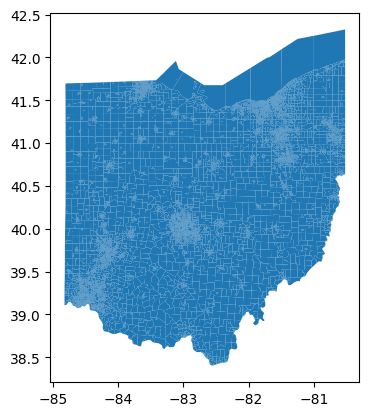

In [49]:
election_df.plot()

## Export to shp

In [51]:
election_df.to_file("./Ohio/Ohio.shp")

Download the folder

In [52]:
!zip -r Ohio.zip Ohio/

  adding: Ohio/ (stored 0%)
  adding: Ohio/Ohio.shx (deflated 33%)
  adding: Ohio/Ohio.cpg (stored 0%)
  adding: Ohio/Ohio.shp (deflated 36%)
  adding: Ohio/Ohio.prj (deflated 19%)
  adding: Ohio/Ohio.dbf (deflated 93%)
